### [Data analysis theory notes](https://www.youtube.com/playlist?list=PLeo1K3hjS3uuKaU2nBDwr6zrSOTzNCs0l)

In [1]:
import pandas as pd

df = pd.DataFrame(
    { 'income': [1000, 1200, 1500, 23400, 1850, 900, 2100, 1200] },
    index=['fabi', 'nico', 'mati', 'flor', 'toto', 'mari', 'fran', 'dani']
)

# 'flor' value is an outlier
df = df.sort_values('income', ascending=True)
df

,income
mari,900
fabi,1000
nico,1200
dani,1200
mati,1500
toto,1850
fran,2100
flor,23400


### [Basic metrics](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/median/)

In [2]:
# mean (average value)
# useful when elements are evenly distributed
print('mean:', df.mean().values)

# median (central value)
# useful when there are outliers in the set
print('median:', df.median().values)

# mode (most frequent values)
print('mode:', df.mode().values)

mean: [4143.75]
median: [1350.]
mode: [[1200]]


### [Percentiles](https://www.statisticshowto.com/probability-and-statistics/percentiles-rank-range/)

In [3]:
# percentiles (divide the set into 100 equal parts)
df.describe()

,income
count,8.000000
mean,4143.750000
std,7791.636427
min,900.000000
25%,1150.000000
50%,1350.000000
75%,1912.500000
max,23400.000000


### [Remove outliers using 99th percentile](https://youtu.be/t4LOv9h-FJM?t=829)

In [4]:
# 99th percentile is useful to drop outliers
percentile_99 = df.income.quantile(0.99)
percentile_100 = df.income.quantile(1)
print('99th percentile:', int(percentile_99))
print('100th percentile:', int(percentile_100))

# remove outlier ('flor' value)
df_aux = df[df.income <= percentile_99]
percentile_100 = df_aux.income.quantile(1)
print('\nnew 100th percentile:', int(percentile_100))
df_aux

99th percentile: 21908
100th percentile: 23400

new 100th percentile: 2100


,income
mari,900
fabi,1000
nico,1200
dani,1200
mati,1500
toto,1850
fran,2100


### [Fill missing values using median](https://youtu.be/t4LOv9h-FJM?t=907)

In [5]:
import numpy as np

# delete 'nico' value
df_aux = df
df_aux.iloc[2,0] = np.NaN
print('delete nico\'s income:', df_aux.iloc[2,0])

# fill Nans with mean (sensitive to outliers)
# fill NaNs with median (not sensitive to outliers)
df_aux = df_aux.fillna(df_aux['income'].median())
print('fill nico\'s income:', df_aux.iloc[2,0])

delete nico's income: nan
fill nico's income: 1500.0


### [Dispersion](https://youtu.be/yCDevFTNbC0)

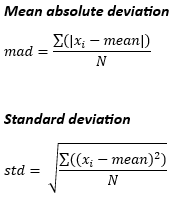

In [6]:
# mean absolute deviation (sensitive to outliers)
mean = np.mean(df)
mad = np.mean(np.abs(df - mean))
print('mad:', mad)

# standard deviation (not sensitive to outliers)
print('std:', df['income'].std())

mad: 5381.632653061225
std: 8317.286931732122


### [Normal distribution](https://youtu.be/okhrFgaUwio?t=21)

- σ = standard deviation
- µ = mean

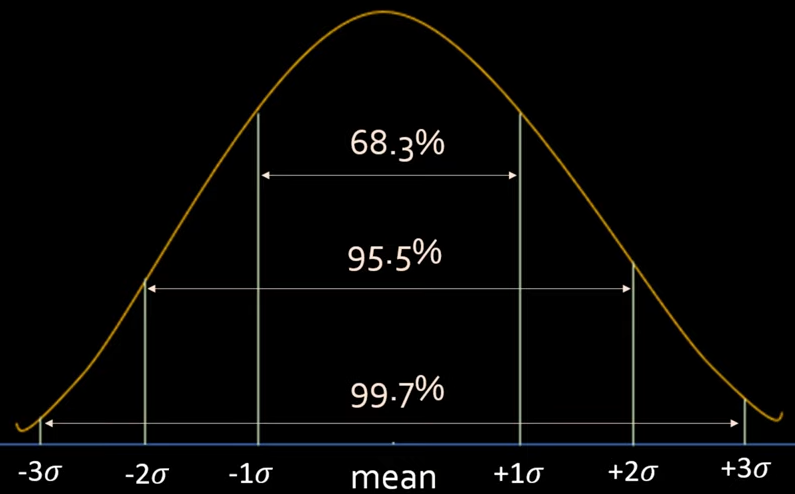

<Axes: ylabel='Count'>

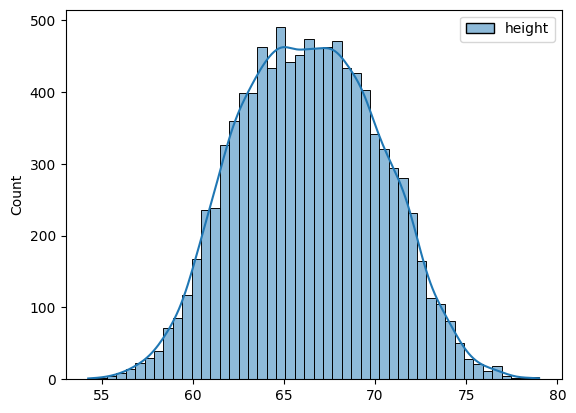

In [7]:
import seaborn as sn

df = pd.read_csv("assets/weight-height.csv")
df_aux = df.drop('Weight', axis=1)
df_aux.columns = ["gender", "height"]

# kde: optional argument to visualize the curve
sn.histplot(df_aux, kde=True)

### Remove outliers using std

In [8]:
mean = df_aux.height.mean()
std = df_aux.height.std()

print('Outliers:')
print(f'   any value smaller than -3σ ({mean - 3 * std})')
print(f'   any value greater than +3σ ({mean + 3 * std})')

outliers_quantity = df_aux[(df_aux.height < mean - 3 * std) | (df_aux.height > mean + 3 * std)].shape
print(f'\ntotal values: {df_aux.shape[0]}')
print(f'total outleirs: {outliers_quantity[0]}')


Outliers:
   any value smaller than -3σ (54.82497539250156)
   any value greater than +3σ (77.91014411714093)

total values: 10000
total outleirs: 7


In [9]:
# remove 7 outliers
df_clean = df_aux[(df_aux.height > mean - 3 * std) & (df_aux.height < mean + 3 * std)]
print(f'total values: {df_clean.shape[0]}')

total values: 9993


### [Z score](https://youtu.be/okhrFgaUwio?t=790)

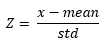

In [10]:
print(f'total values: {df_aux.shape[0]}')

# z score (how many STDs away a value is from mean)
df_aux['zscore'] = (df_aux.height - df_aux.height.mean()) / df_aux.height.std()
df_aux.head()

total values: 10000


,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


### Remove outliers using zscore (same as using std)

In [11]:
df_aux[(df_aux.zscore < -3) | (df_aux.zscore > 3)]

print('Outliers:')
print(f'   any value\'s zscore smaller than -3')
print(f'   any value\'s zscore greater than +3')

outliers_quantity = df_aux[(df_aux.zscore < -3) | (df_aux.zscore > 3)].shape
print(f'\ntotal values: {df_aux.shape[0]}')
print(f'total outleirs: {outliers_quantity[0]}')

Outliers:
   any value's zscore smaller than -3
   any value's zscore greater than +3

total values: 10000
total outleirs: 7


In [12]:
# remove 7 outliers
df_clean = df_aux[(df_aux.zscore > -3) & (df_aux.zscore < 3)]
print(f'total values: {df_clean.shape[0]}')

total values: 9993
